# Machine Learning Regression

Hi Saya Suwarti.. Disini saya akan coba sedikit sharing2 tentang Machine Learning Regression..

# Simple Linear Regression

import library-library yg akan diperlukan..

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

load dataset.. disini dataset yg akan digunakan adalah data Salary_Data.csv


In [3]:
df = pd.read_csv('data/Salary_Data.csv')

tampilkan data nya

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.shape

(30, 2)

tampilkan value column nya

In [18]:
x = df.iloc[:, :-1].values

In [19]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [20]:
y = df.iloc[:, -1].values

In [21]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Splitting Training and Test Set

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

# Fitting Into Training

In [29]:
regressor = LinearRegression()

In [30]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
regressor.coef_

array([9345.94244312])

# Predict The Result

In [31]:
y_pred = regressor.predict(x_test)

In [32]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [33]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [34]:
regressor.intercept_

26816.19224403117

# Plot The Result

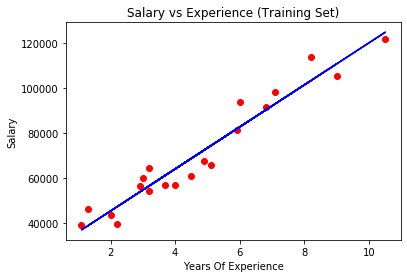

In [40]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [41]:
temp = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})

In [42]:
temp

,Actual,Predict
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


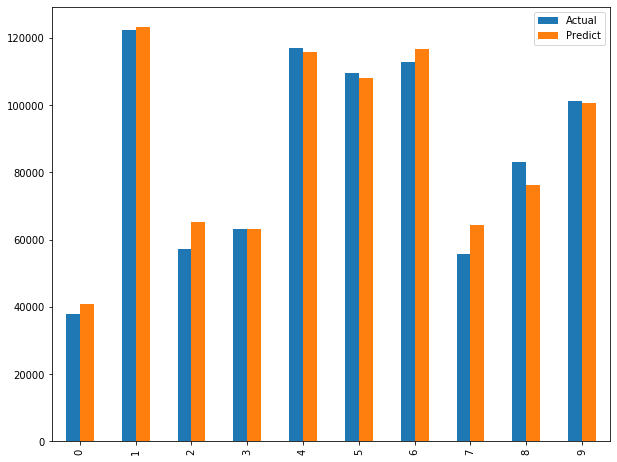

In [46]:
temp.plot(kind = 'bar', figsize = (10,8))
plt.show()

In [51]:
temp_1 = pd.DataFrame({'Actual':y_train, 'Predict':regressor.predict(x_train)})

In [52]:
temp_1

,Actual,Predict
0,56642.0,53919.425329
1,66029.0,74480.498704
2,64445.0,56723.208062
3,61111.0,68872.933238
4,113812.0,103452.920278
5,91738.0,90368.600857
6,46205.0,38965.917420
7,121872.0,124948.587897
8,60150.0,54854.019573
9,39891.0,47377.265619


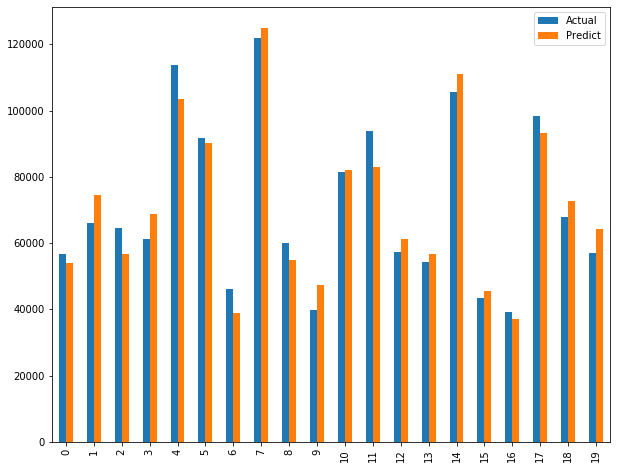

In [57]:
temp_1.plot(kind='bar', figsize=(10,8))
plt.show()

# Evaluate Model

In [59]:
mse = 1/len(x_test) * np.sum((y_pred - y_test)**2)
mae = 1/len(x_test) * np.sum(np.abs(y_pred - y_test))
print('mse :{}'.format(mse))
print('mae :{}'.format(mae))

mse :21026037.329511303
mae :3426.4269374307096


# Multiple Linear Regression

load dataset.. disini dataset yg akan digunakan adalah data 50_Startups.csv

In [60]:
df_1 = pd.read_csv('data/50_Startups.csv')

tampilkan data nya

In [62]:
df_1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [63]:
df_1.shape

(50, 5)

In [64]:
df_1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [66]:
df_1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

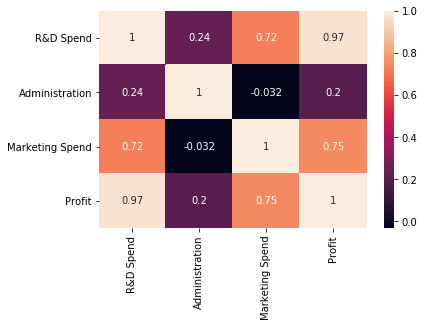

In [65]:
sns.heatmap(df_1.corr(), annot=True)

In [77]:
#drop_first = True, artinya ada satu variable yg kita buang
#tapi bila drop_first = False, akan tampil semua variable nya

df_1_dummies = pd.get_dummies(df_1['State'], drop_first = True)
df_1_dummies.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [81]:
temp_2 = pd.concat([df_1_dummies,df_1], axis = 1)

In [82]:
temp_2

,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,1,0,142107.34,91391.77,366168.42,Florida,166187.94
5,0,1,131876.90,99814.71,362861.36,New York,156991.12
6,0,0,134615.46,147198.87,127716.82,California,156122.51
7,1,0,130298.13,145530.06,323876.68,Florida,155752.60
8,0,1,120542.52,148718.95,311613.29,New York,152211.77
9,0,0,123334.88,108679.17,304981.62,California,149759.96


In [83]:
temp_2.drop(['State','R&D Spend'],axis=1,inplace =True)

In [85]:
temp_2.head()

,Florida,New York,Administration,Marketing Spend,Profit
0,0,1,136897.80,471784.10,192261.83
1,0,0,151377.59,443898.53,191792.06
2,1,0,101145.55,407934.54,191050.39
3,0,1,118671.85,383199.62,182901.99
4,1,0,91391.77,366168.42,166187.94


In [86]:
x = temp_2.iloc[:, :-1].values
y = temp_2.iloc[:, -1].values

In [87]:
x

array([[0.0000000e+00, 1.0000000e+00, 1.3689780e+05, 4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 9.9814710e+04, 3.6286136e+05],
       [0.0000000e+00, 0.0000000e+00, 1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4871895e+05, 3.1161329e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0867917e+05, 3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 1.1059411e+05, 2.2916095e+05],
       [0.0000000e+00, 0.0000000e+00, 9.1790610e+04, 2.4974455e+05],
       [1.0000000e+00, 0.0000000e+00, 1.2732038e+05, 2.4983944e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3549507e+05, 2.5266493e+05],
       [1.0000000e+00, 0.0000000e+

In [88]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

# Splitting Training and Test Set

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

# Fitting Into Training

In [91]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predict The Result

In [92]:
y_pred = regressor.predict(x_test)

In [93]:
regressor.intercept_

7296.179522962178

# Plot The Result

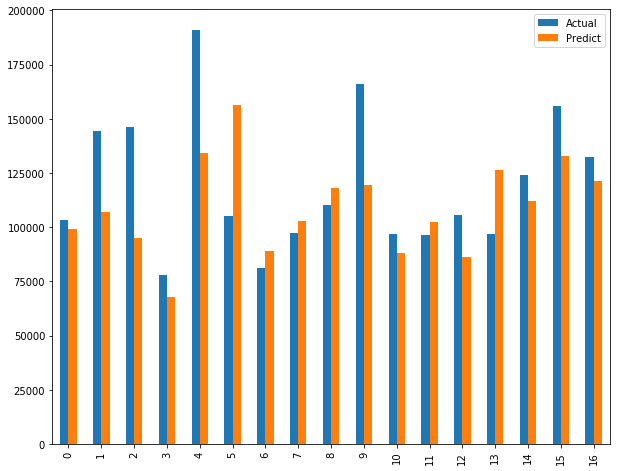

In [95]:
temp_3 = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
temp_3.plot(kind='bar',figsize=(10,8))
plt.show()

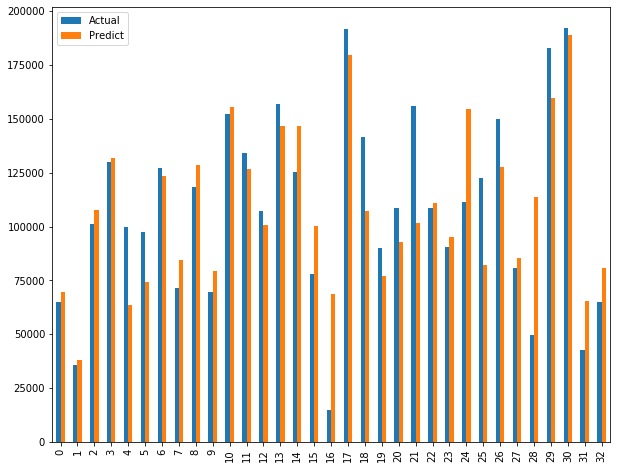

In [97]:
temp_3 = pd.DataFrame({'Actual':y_train,'Predict':regressor.predict(x_train)})
temp_3.plot(kind='bar',figsize=(10,8))
plt.show()

In [99]:
mse = 1/len(x_test) * np.sum((y_pred - y_test)**2)
mae = 1/len(x_test) * np.sum(np.abs(y_pred - y_test))
print('mse :{}'.format(mse))
print('mae :{}'.format(mae))

mse :851022249.9109218
mae :22812.99614783496


# Bonus, linear regression With Statsmodel

In [100]:
import statsmodels.api as sm
from scipy import stats

In [103]:
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           7.78e-09
Time:                        21:23:03   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.903e+04   1.84e+04      1.033      0.3

In [104]:
X = temp_3.iloc[:, :-1].values
y = temp_3.iloc[:, -1].values

In [107]:
y

array([ 69812.66311575,  38163.45418867, 107709.03101942, 132017.27699575,
        63635.87939193,  74102.65930811, 123619.62276021,  84530.57244043,
       128592.06770275,  79339.14734771, 155316.2582616 , 126779.79972798,
       100779.82045812, 146649.59941688, 146722.95066545, 100158.11049881,
        68611.7412259 , 179882.51985911, 107059.7962282 ,  77048.85044721,
        92646.02665464, 101594.42124881, 111057.44290821,  95161.8328963 ,
       154620.3906424 ,  81998.57536173, 127885.61528452,  85372.97025789,
       113541.08857561, 159691.88260587, 188971.89372439,  65627.70600452,
        80829.30277512])

In [108]:
x = temp_2.iloc[:, :-1].values
y = temp_2.iloc[:, -1].values

In [109]:
x

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94],
       [ 96778.92],
       [ 96479.51],
       [105733.54],
       [ 96712.8 ],
       [124266.9 ],
       [155752.6 ],
       [132602.65]])

In [110]:
y

array([ 99031.91569209, 107248.79591634,  94853.02254142,  68055.1045176 ,
       134030.82797381, 156390.20053313,  89099.67943062, 102989.81611394,
       118042.75658368, 119725.9121416 ,  88092.77378505, 102225.62030226,
        86291.80032131, 126213.15832431, 112303.55073819, 132813.64402185,
       121262.95912549])

# Sekian

Sekian dulu ya sedikit sharing2 kali ini, terima kasih..